In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns 
import neattext.functions as nfx
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [6]:
df=pd.read_csv('/Users/mukund/Desktop/IIT_KGP/MLDL/ML_APP/notebook/dataset/tweet_emotions.csv')

In [7]:
# df.head()
df=df.drop('tweet_id',axis=1)

In [8]:
# df.head()
# df.shape
df=df.dropna()


In [146]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


<Axes: xlabel='sentiment', ylabel='count'>

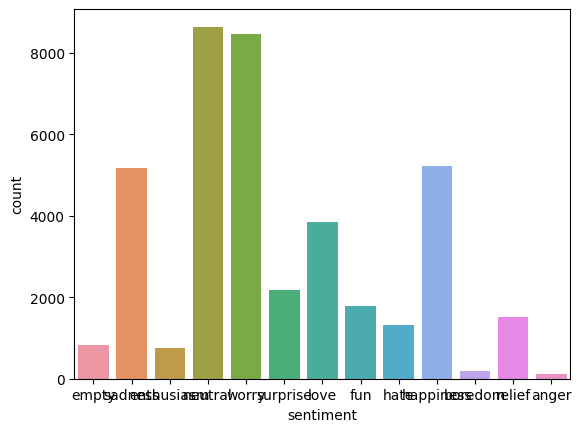

In [147]:
sns.countplot(x='sentiment',data=df )

In [148]:
df['text']=df['content'].apply(nfx.remove_userhandles)

In [149]:
df['text']=df['text'].apply(nfx.remove_stopwords)

In [150]:
X=df['text']
y=df['sentiment']

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(steps=[
    ('tf',TfidfVectorizer()),
    ('log_reg',LogisticRegression())
])

TFIDF ALSO NOT DOING WELL THE OTHER OPTION IS TO USE DL MODELS TO DO THE PREDICTIONS 
1. USING LSTM
2. USING TRANSFORMERS 

count vectorizer not doing great lemme use tfidf and see if the result is any better 

In [127]:
pipe.fit(X_train,y_train)

/Users/mukund/Desktop/IIT_KGP/MLDL/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tf', TfidfVectorizer()), ('log_reg', LogisticRegression())])

In [128]:
pipe.score(X_test,y_test)

0.34408333333333335

In [129]:
pipe_nb=Pipeline(steps=[
    ('tf',TfidfVectorizer()),
    ('nb',MultinomialNB())

])

In [130]:
labels=y.nunique()

In [131]:
print(labels)

13


In [132]:
pipe_nb.fit(X_train,y_train)
pipe_nb.score(X_test,y_test)

0.2935

In [133]:
# import keras
import joblib
pipeline_file =open('piped_file_emotions.pkl','wb')
joblib.dump(pipe,pipeline_file)

In [134]:
# classical ml models not doing great may be good to try tfidf vector 
pipeline_file.close()

In [135]:
!pip install keras


In [ ]:
!pip install nltk

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Embedding,Flatten
from keras.layers import LSTM, Bidirectional
from keras.models import load_model, save_model
from matplotlib import pyplot
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
from keras.layers import Embedding,Flatten,Conv1D,MaxPooling1D
# from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import sys
from keras.callbacks import ModelCheckpoint
import time

In [3]:
from keras.utils import pad_sequences

In [13]:
labels=df['sentiment'].nunique()

In [15]:
dataFrame=pd.read_csv('/Users/mukund/Desktop/IIT_KGP/MLDL/ML_APP/notebook/dataset/tweet_emotions.csv', encoding='utf-8')

x=dataFrame.values[:,0]
y=dataFrame.values[:,1]

In [16]:
stop_words = set(stopwords.words('english')) 
new_stop_words=set(stop_words)

# adding woudlnt type of words into stopwords list
for s in stop_words:
	new_stop_words.add(s.replace('\'',''))
	pass
	
stop_words=new_stop_words
print("Excluding stopwords ...")

# removing @ from default base filter, to remove that whole word, which might be considered as user or page name
base_filters='\n\t!"#$%&()*+,-./:;<=>?[\]^_`{|}~ '

word_sequences=[]

for i in x:
	i=str(i)
	i=i.replace('\'', '')
	newlist = [x for x in text_to_word_sequence(i,filters=base_filters, lower=True) if not x.startswith("@")]
	filtered_sentence = [w for w in newlist if not w in stop_words] 
	word_sequences.append(filtered_sentence)
	pass


Excluding stopwords ...


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_sequences)
word_indices = tokenizer.texts_to_sequences(word_sequences)
word_index = tokenizer.word_index
print("Tokenized to Word indices as ")
print(np.array(word_indices).shape)

Tokenized to Word indices as 
(40000, 1)


In [19]:
x_data=pad_sequences(word_indices,maxlen=100)
print("After padding data")
print(x_data.shape)

After padding data
(40000, 100)


In [21]:
print("Loading Glove Vectors ...")

embeddings_index = {}
f = open(os.path.join('', '/Users/mukund/Desktop/IIT_KGP/MLDL/ML_APP/notebook/glove.6B.50d.txt'),'r',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded GloVe Vectors Successfully')

embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print("Embedding Matrix Generated : ",embedding_matrix.shape)

embedding_layer = Embedding(len(word_index) + 1,50, weights=[embedding_matrix],input_length=100,trainable=False)


Loading Glove Vectors ...
Loaded GloVe Vectors Successfully
Embedding Matrix Generated :  (40001, 50)


In [22]:
from keras.utils import to_categorical
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print("Label Encoding Classes as ")
print(le_name_mapping)

y_data=to_categorical(integer_encoded)
print("One Hot Encoded class shape ")
print(y_data.shape)

Label Encoding Classes as 
{0: 'anger', 1: 'boredom', 2: 'empty', 3: 'enthusiasm', 4: 'fun', 5: 'happiness', 6: 'hate', 7: 'love', 8: 'neutral', 9: 'relief', 10: 'sadness', 11: 'surprise', 12: 'worry'}
One Hot Encoded class shape 
(40000, 13)


In [ ]:
from keras.layers import Bidirectional
from keras.layers import CuDNNLSTM

In [ ]:
model=Sequential()
model.add(embedding_layer)
# model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
# model.add(LSTM(64))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(Dense(y_data.shape[1],activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

In [77]:
print("Finished Preprocessing data ...")
print("x_data shape : ",x_data.shape)
print("y_data shape : ",y_data.shape)

# spliting data into training, testing set
print("spliting data into training, testing set")
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)

Finished Preprocessing data ...
x_data shape :  (40000, 100)
y_data shape :  (40000, 13)
spliting data into training, testing set


In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50)


In [102]:
sample="I love my mom"
sample=pd.Series(sample)


In [103]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sample)
word_indices = tokenizer.texts_to_sequences(sample)
word_index = tokenizer.word_index
print("Tokenized to Word indices as ")
print(np.array(word_indices).shape)

Tokenized to Word indices as 
(1, 4)


In [104]:
x_sample=pad_sequences(word_indices,maxlen=100)
print("After padding data")
print(x_sample.shape)

After padding data
(1, 100)


In [105]:
y_pred=model.predict(x_sample)

1/1 [==============================] - 0s 13ms/step


In [106]:
print(np.argmax(y_pred))

8


In [108]:
save_model(model,'model_lstm.h5')

/var/folders/wj/6jg12cbs03z4_mtt44nmqqg40000gn/T/ipykernel_11505/4136699691.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'model_lstm.h5')


In [112]:
import joblib
model1=joblib.load('/Users/mukund/Desktop/IIT_KGP/MLDL/ML_APP/App/models/piped_file_emotions.pkl','r')

In [120]:
# from sklearn.ensemble import VotingClassifier
# models=[('rf',model1),('lstm',model)]
# ensemble=VotingClassifier(estimators=models,voting='hard')
# ensemble.fit(x_train,y_train)

NotImplementedError: Multilabel and multi-output classification is not supported.